In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_x = train_images/255.0
test_x = test_images/255.0

train_y = tf.keras.utils.to_categorical(train_labels)
test_y = tf.keras.utils.to_categorical(test_labels)

In [4]:
def valid_callback(name):
    return [tf.keras.callbacks.EarlyStopping(monitor='val_ce', patience=20),
           tfdocs.modeling.EpochDots()]

In [5]:
def compile_and_fit(model, name, max_epochs=1000):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.losses.CategoricalCrossentropy(from_logits=True, name='ce'),'accuracy'])
    
    history = model.fit(train_x, train_y, 
                        epochs=max_epochs, 
                        batch_size = 64,
                        callbacks=valid_callback(name), 
                        validation_data=(test_x,test_y))
    
    return history

histories={}

In [6]:
large = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(10)
])

histories['large'] = compile_and_fit(large, 'large')

Epoch 1/1000
782/782 [==============================] - 16s 20ms/step - loss: 1.8463 - ce: 1.8462 - accuracy: 0.3263 - val_loss: 1.8410 - val_ce: 1.8398 - val_accuracy: 0.3437

Epoch: 0, accuracy:0.3263,  ce:1.8462,  loss:1.8463,  val_accuracy:0.3437,  val_ce:1.8398,  val_loss:1.8410,  
.Epoch 2/1000
782/782 [==============================] - 15s 19ms/step - loss: 1.6568 - ce: 1.6567 - accuracy: 0.4027 - val_loss: 1.6072 - val_ce: 1.6070 - val_accuracy: 0.4090
.Epoch 3/1000
782/782 [==============================] - 14s 18ms/step - loss: 1.5682 - ce: 1.5678 - accuracy: 0.4366 - val_loss: 1.5520 - val_ce: 1.5521 - val_accuracy: 0.4426
.Epoch 4/1000
782/782 [==============================] - 13s 16ms/step - loss: 1.5145 - ce: 1.5149 - accuracy: 0.4560 - val_loss: 1.5115 - val_ce: 1.5119 - val_accuracy: 0.4608
.Epoch 5/1000
782/782 [==============================] - 12s 16ms/step - loss: 1.4659 - ce: 1.4659 - accuracy: 0.4727 - val_loss: 1.4780 - val_ce: 1.4786 - val_accuracy: 0.4794
.Epo

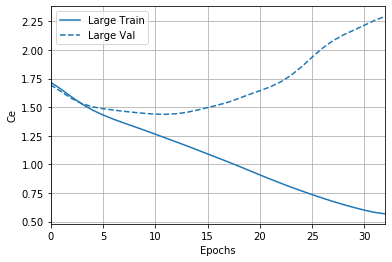

In [7]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

In [8]:
l2_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10)
])

histories['l2'] = compile_and_fit(l2_model, 'l2')

Epoch 1/1000
782/782 [==============================] - 20s 25ms/step - loss: 2.3156 - ce: 1.8625 - accuracy: 0.3235 - val_loss: 1.9045 - val_ce: 1.7203 - val_accuracy: 0.3726

Epoch: 0, accuracy:0.3235,  ce:1.8625,  loss:2.3156,  val_accuracy:0.3726,  val_ce:1.7203,  val_loss:1.9045,  
.Epoch 2/1000
782/782 [==============================] - 19s 25ms/step - loss: 1.8539 - ce: 1.7106 - accuracy: 0.3807 - val_loss: 1.7924 - val_ce: 1.6728 - val_accuracy: 0.4035
.Epoch 3/1000
782/782 [==============================] - 19s 24ms/step - loss: 1.7488 - ce: 1.6382 - accuracy: 0.4103 - val_loss: 1.6960 - val_ce: 1.5894 - val_accuracy: 0.4256
.Epoch 4/1000
782/782 [==============================] - 18s 23ms/step - loss: 1.7027 - ce: 1.5962 - accuracy: 0.4246 - val_loss: 1.6759 - val_ce: 1.5686 - val_accuracy: 0.4359
.Epoch 5/1000
782/782 [==============================] - 19s 24ms/step - loss: 1.6674 - ce: 1.5590 - accuracy: 0.4394 - val_loss: 1.6657 - val_ce: 1.5571 - val_accuracy: 0.4429
.Epo

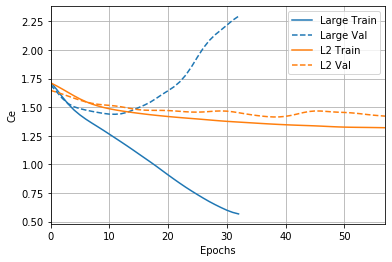

In [9]:
plotter.plot(histories)

In [10]:
dropout_histories = {}
dropout_histories['large'] = histories['large']

dropout_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(10)
])

dropout_histories['dropout'] = compile_and_fit(dropout_model, 'dropout')

Epoch 1/1000
782/782 [==============================] - 17s 20ms/step - loss: 1.9743 - ce: 1.9743 - accuracy: 0.2697 - val_loss: 1.8101 - val_ce: 1.8097 - val_accuracy: 0.3450

Epoch: 0, accuracy:0.2697,  ce:1.9743,  loss:1.9743,  val_accuracy:0.3450,  val_ce:1.8097,  val_loss:1.8101,  
.Epoch 2/1000
782/782 [==============================] - 16s 20ms/step - loss: 1.8555 - ce: 1.8555 - accuracy: 0.3198 - val_loss: 1.7433 - val_ce: 1.7430 - val_accuracy: 0.3731
.Epoch 3/1000
782/782 [==============================] - 15s 20ms/step - loss: 1.8123 - ce: 1.8122 - accuracy: 0.3373 - val_loss: 1.7172 - val_ce: 1.7169 - val_accuracy: 0.3740
.Epoch 4/1000
782/782 [==============================] - 15s 20ms/step - loss: 1.7904 - ce: 1.7905 - accuracy: 0.3472 - val_loss: 1.7170 - val_ce: 1.7166 - val_accuracy: 0.3890
.Epoch 5/1000
782/782 [==============================] - 14s 18ms/step - loss: 1.7581 - ce: 1.7582 - accuracy: 0.3600 - val_loss: 1.6431 - val_ce: 1.6429 - val_accuracy: 0.4164
.Epo

782/782 [==============================] - 15s 20ms/step - loss: 1.5398 - ce: 1.5402 - accuracy: 0.4456 - val_loss: 1.5087 - val_ce: 1.5086 - val_accuracy: 0.4668
.Epoch 93/1000
782/782 [==============================] - 14s 18ms/step - loss: 1.5441 - ce: 1.5443 - accuracy: 0.4448 - val_loss: 1.5377 - val_ce: 1.5378 - val_accuracy: 0.4623
.Epoch 94/1000
782/782 [==============================] - 14s 18ms/step - loss: 1.5396 - ce: 1.5395 - accuracy: 0.4469 - val_loss: 1.5348 - val_ce: 1.5347 - val_accuracy: 0.4508
.

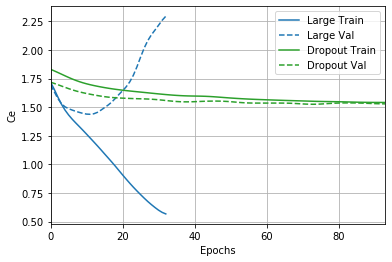

In [11]:
plotter.plot(dropout_histories)

In [13]:
combined_histories = {}
combined_histories['l2'] = histories['l2']
combined_histories['dropout'] = dropout_histories['dropout']

combined_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(10)
])

combined_histories['combined'] = compile_and_fit(combined_model, 'combined')

Epoch 1/1000
782/782 [==============================] - 24s 29ms/step - loss: 2.4718 - ce: 1.9884 - accuracy: 0.2638 - val_loss: 2.0266 - val_ce: 1.8680 - val_accuracy: 0.3121

Epoch: 0, accuracy:0.2638,  ce:1.9884,  loss:2.4718,  val_accuracy:0.3121,  val_ce:1.8680,  val_loss:2.0266,  
.Epoch 2/1000
782/782 [==============================] - 21s 27ms/step - loss: 1.9837 - ce: 1.8771 - accuracy: 0.3068 - val_loss: 1.8449 - val_ce: 1.7641 - val_accuracy: 0.3541
.Epoch 3/1000
782/782 [==============================] - 22s 27ms/step - loss: 1.9075 - ce: 1.8324 - accuracy: 0.3282 - val_loss: 1.8275 - val_ce: 1.7545 - val_accuracy: 0.3760
.Epoch 4/1000
782/782 [==============================] - 22s 28ms/step - loss: 1.8876 - ce: 1.8139 - accuracy: 0.3362 - val_loss: 1.8109 - val_ce: 1.7360 - val_accuracy: 0.3711
.Epoch 5/1000
782/782 [==============================] - 25s 32ms/step - loss: 1.8788 - ce: 1.8044 - accuracy: 0.3408 - val_loss: 1.7661 - val_ce: 1.6896 - val_accuracy: 0.3942
.Epo

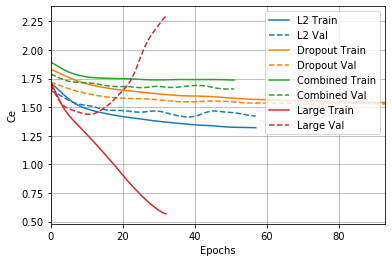

In [19]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
combined_histories['large'] = histories['large']
plotter.plot(combined_histories)

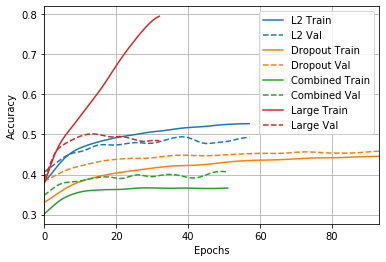

In [17]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(combined_histories)